In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [18]:
df_learn = pd.read_csv("../experiments/randman/df_learn.csv")
df_runtime = pd.read_csv("../experiments/randman/df_runtime.csv")

In [20]:
df_learn[df_learn["Epoch"] == 1500]

,Epoch,Sim ID,Accuracy,Loss,Model,Method
19,1500.0,0,0.676842,0.044103,Spike,Random Feedback
39,1500.0,0,0.983158,0.047248,Spike,Feedback Align
59,1500.0,0,0.914737,0.010181,Rate,Random Feedback
79,1500.0,0,0.920000,0.010630,Rate,Feedback Align


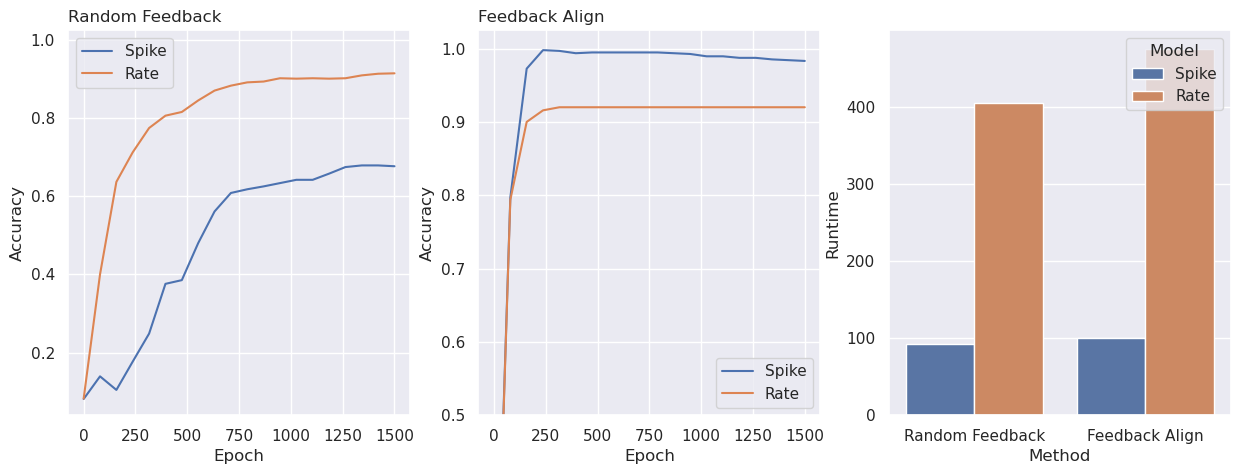

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

#sns.lineplot((df_learn[(df_learn["Method"] == "Random Feedback") * (df_learn["Model"] == "Spike")]),
#             x="Epoch", y="Accuracy", hue="Sim ID", ax=ax[0])#, units="Sim ID", estimator=None)

sns.lineplot(df_learn[df_learn["Method"] == "Random Feedback"],
             x="Epoch", y="Accuracy", hue="Model", ax=ax[0])#, units="Sim ID", estimator=None)

ax[0].legend()
ax[0].set_title("Random Feedback", loc="left")
ax[0].set_ylim(top=1.025)

sns.lineplot(df_learn[df_learn["Method"] == "Feedback Align"],
             x="Epoch", y="Accuracy", hue="Model", ax=ax[1])#, units="Sim ID", estimator=None)

ax[1].legend()
ax[1].set_title("Feedback Align", loc="left")
ax[1].set_ylim(bottom=0.8, top=1.025)

sns.barplot(data=df_runtime, x="Method",
            hue="Model", y="Runtime", ax=ax[2])

plt.show()